In [2]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
#empty lists to store image data and labels
data = []
labels = []
classes = 43

#path to the folder containing the training data
cur_path = '/Users/brockada/Desktop/GermanTrafficSigns'

#iterating over all the class folders in the training dataset
for i in range(classes):
    #path to the class folder
    path = os.path.join(cur_path,'Train', str(i))
    #list of all the images in the class folder
    images = os.listdir(path)
    
    #iterating over all the images in the class folder
    for a in images:
        try:
            #opening the image using the PIL library
            image = Image.open(path + '/' + a)
            #resizing the image to 30x30 pixels
            image = image.resize((30,30))
            #converting the image into a numpy array
            image = np.array(image)
            
            #adding the image data and label to the respective lists
            data.append(image)
            labels.append(i)
        except Exception as e:
            print("There was an error with the path:", str(e), path)

In [6]:
#converting the lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

#printing the length and shape of the training dataset
print("The data has", str(len(data)), "rows of data")
print(data.shape, labels.shape)

The data has 39209 rows of data
(39209, 30, 30, 3) (39209,)


In [7]:
#splitting the training dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#printing the shape of the training and testing datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#converting the labels into one-hot encoding vectors
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

This code is taking the target labels for both the training and testing datasets, which are originally in integer form, and converting them into one-hot encoding vectors. One-hot encoding is a technique used to represent categorical variables as binary vectors, where only one element is 1 and the rest are 0s. This is commonly used in machine learning models that require categorical variables to be represented in a numeric form.

In [9]:
#defining the model architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Metal device set to: Apple M1 Pro


2023-03-23 21:02:43.761580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-23 21:02:43.761888: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


This code is defining the architecture of the neural network model that will be trained on the data. The model is a Sequential model, which means that the layers are stacked one after the other. The layers in the model include:

Conv2D layers: These are convolutional layers that apply filters to the input image to extract features. The filters have a size of 5x5 and there are 32 filters in the first two layers and 64 filters in the last two layers.
MaxPool2D layers: These are pooling layers that downsample the output of the convolutional layers. The pooling size is 2x2.
Dropout layers: These are regularization layers that randomly drop some of the connections between neurons to prevent overfitting. The dropout rate is set to 0.25 for the first two dropout layers and 0.5 for the last dropout layer.
Flatten layer: This layer flattens the output from the convolutional layers into a 1D array, which is required for the fully connected layers.
Dense layers: These are fully connected layers that apply weights to the features extracted by the convolutional layers. There are two dense layers in this model with 256 and 43 neurons, respectively. The activation function used for the first dense layer is ReLU, and the activation function used for the last dense layer is softmax, which is commonly used for multi-class classification tasks.

In [10]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#number of epochs for training
epochs = 8
#training the model on the training dataset
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
#saving the trained model
model.save("german_traffic_model.h5")


Epoch 1/8


2023-03-23 21:03:49.377957: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-23 21:03:49.793646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - ETA: 0s - loss: 2.1483 - accuracy: 0.4903

2023-03-23 21:03:59.545036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


491/491 [==============================] - 11s 15ms/step - loss: 2.1483 - accuracy: 0.4903 - val_loss: 0.6523 - val_accuracy: 0.8410
Epoch 2/8
491/491 [==============================] - 6s 13ms/step - loss: 0.7057 - accuracy: 0.8004 - val_loss: 0.2985 - val_accuracy: 0.9220
Epoch 3/8
491/491 [==============================] - 6s 13ms/step - loss: 0.4391 - accuracy: 0.8732 - val_loss: 0.1972 - val_accuracy: 0.9513
Epoch 4/8
491/491 [==============================] - 6s 13ms/step - loss: 0.3277 - accuracy: 0.9045 - val_loss: 0.1227 - val_accuracy: 0.9690
Epoch 5/8
491/491 [==============================] - 6s 13ms/step - loss: 0.2458 - accuracy: 0.9297 - val_loss: 0.0934 - val_accuracy: 0.9742
Epoch 6/8
491/491 [==============================] - 6s 13ms/step - loss: 0.2241 - accuracy: 0.9354 - val_loss: 0.0804 - val_accuracy: 0.9791
Epoch 7/8
491/491 [==============================] - 6s 13ms/step - loss: 0.1922 - accuracy: 0.9446 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 8/8
491/4

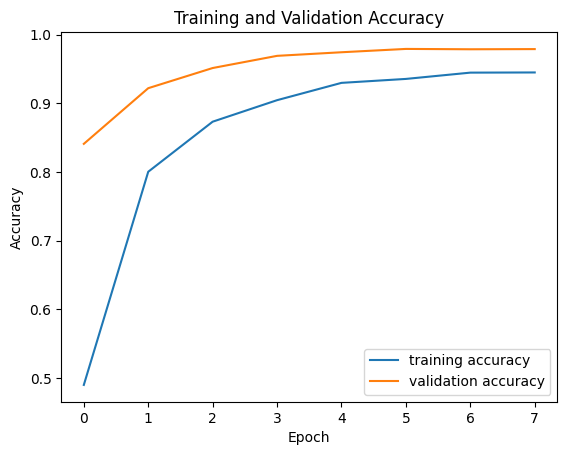

In [12]:
# plot the training and validation accuracy vs epoch
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Testing the trained model on the test dataset

## Load test dataset labels and images paths

In [13]:
test_labels = pd.read_csv('Test.csv')['ClassId'].values
test_images_paths = pd.read_csv('Test.csv')['Path'].values

# Load images, resize them to 30x30 and save them to a list

In [15]:
test_data = []
for path in test_images_paths:
    img = Image.open(path)
    img = img.resize((30, 30))
    test_data.append(np.array(img))

# Convert the test data list to a numpy array

In [16]:
X_test = np.array(test_data)

# Use the trained model to make predictions on the test data

In [17]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

 51/395 [==>...........................] - ETA: 1s

2023-03-23 21:11:16.962273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


395/395 [==============================] - 1s 2ms/step


# Compute and print the accuracy of the model on the test dataset

In [18]:
test_accuracy = accuracy_score(test_labels, y_pred)
print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.9495645288994458
